<a href="https://colab.research.google.com/github/lambertgarrido/gl_assignments/blob/main/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,f1_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# For tuning the model
from sklearn.model_selection import GridSearchCV

In [ ]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Open csv file into pandas dataframe

df = pd.read_csv('/content/drive/MyDrive/GL/ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

No missing values found in data

In [ ]:
# Check for duplicate rows in df

print(df.duplicated().sum())

0


Rows are unique; no duplicate rows found

In [ ]:
# Check for unique values of ID column

df['ID'].unique().shape

(4612,)

In [ ]:
# Check random sample of ID column for any useful data
df['ID'].sample(25)

,ID
4010,EXT4011
1997,EXT1998
2241,EXT2242
935,EXT936
4610,EXT4611
2426,EXT2427
1904,EXT1905
1673,EXT1674
1964,EXT1965
3108,EXT3109


The `ID` column has unique values; randowm sampe reveals no useful data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


The `age` column is slightly left skewed. The columns `website_visits`, `time_spent_on_website`, `page_views_per_Visit` are right skewed.

The following box plots will check for outliers for these continous variables.

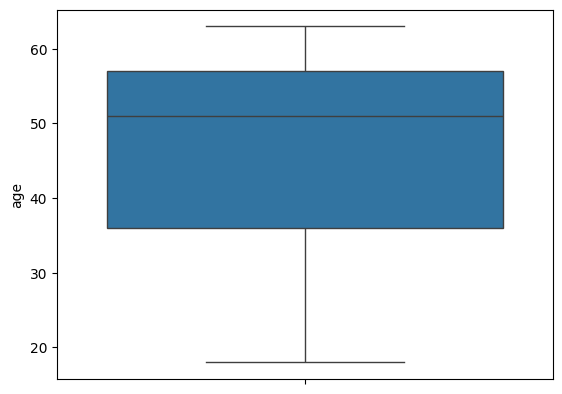

In [ ]:
sns.boxplot(df['age'])
plt.show()

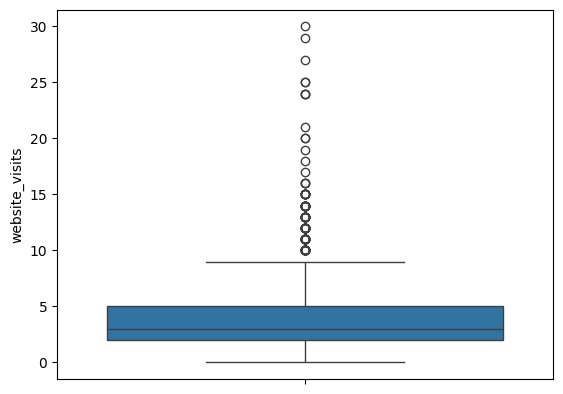

In [ ]:
sns.boxplot(df['website_visits'])
plt.show()

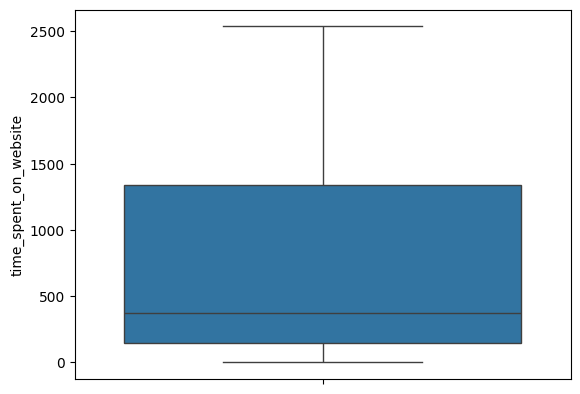

In [ ]:
sns.boxplot(df['time_spent_on_website'])
plt.show()

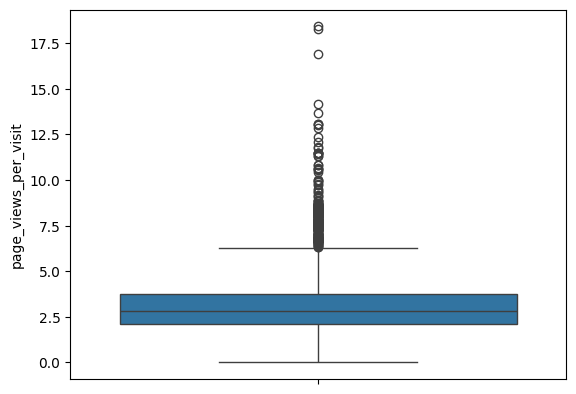

In [ ]:
sns.boxplot(df['page_views_per_visit'])
plt.show()

## Data Preprocessing Observations

- Missing value treatment (if needed)
 - No missing values observed as checked in [Data Overview](#scrollTo=Data_Overview) section
- Feature engineering (if needed)
 - It would be interesting if a lead had heard from this company from multiple sources. A column `yes_lead_count` will be created that will count the number of Yes values for columns: `referral`, `digital_media`, `print_media_type1`, `print_media_type2` `educational_channels`.
- Outlier detection and treatment (if needed)
 - Statistics for `age` indicate left skewed distribution
 - The columns `website_visits`, `time_spent_on_website`, `page_views_per_visit` have right skewed distributions
 - Box plot for `page_views_per_visit` indicates many outliers
 - Also outliers present for `website_visits` but less of them
 - For now will keep these outliers, no need to treat them
- Preparing data for modeling
 - For categorial variables, will need to convert them to numerical using get_dummies function in pandas
 - Per [Data Overview](#scrollTo=Data_Overview), `ID` column contains unique values, so it will be dropped. The values consist of the string EXT plus a sequence of numbers. It doesn't seem that any useful information can be extracted from this column.
- Any other preprocessing steps (if needed)
 - Verified in [Data Overview](#scrollTo=Data_Overview) that all rows are unique.

In [ ]:
# drop ID column
df=df.drop(columns=['ID'])

In [ ]:
# print value counts for the categorical variables
cat_columns=df.select_dtypes(include='object').columns.tolist()
for col in cat_columns:
  print(df[col].value_counts())
  print('-'*50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

The categorical variables have either 2 or 3 possible values

In [ ]:
# get distribution of status column
df['status'].value_counts()

,count
status,
0,3235
1,1377


In [ ]:
df['status'].value_counts(normalize=True)

,proportion
status,
0,0.701431
1,0.298569


We can see for the target variable `status` an imbalance between 0 and 1 values.

This imbalance will be taken into account when building the classification models.

In [ ]:
#build a column based on referral, digital_media, print_media_type1,
#print_media_type2, educational_channels. For each row, look at these 4 columns
#and count the number of Yes values that appear.

def count_yes(row):
  count = 0
  for col in ['referral', 'digital_media', 'print_media_type1',
              'print_media_type2', 'educational_channels']:
    if row[col] == 'Yes':
      count += 1
  return count

df['yes_lead_count'] = df.apply(count_yes, axis=1)

In [ ]:
df['yes_lead_count'].value_counts()

,count
yes_lead_count,
0,2883
1,1442
2,251
3,33
4,3


Most leads had not seen the various digital / print media campaigns from this company

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale
# Borrowed from https://olympus.mygreatlearning.com/courses/119822/modules/items/6889254?pb_id=18035

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

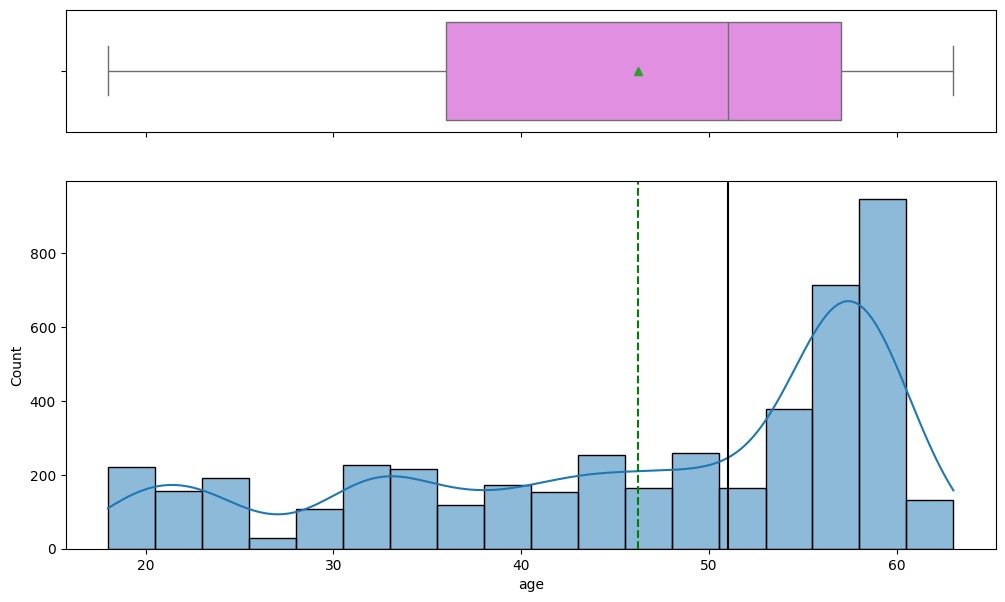

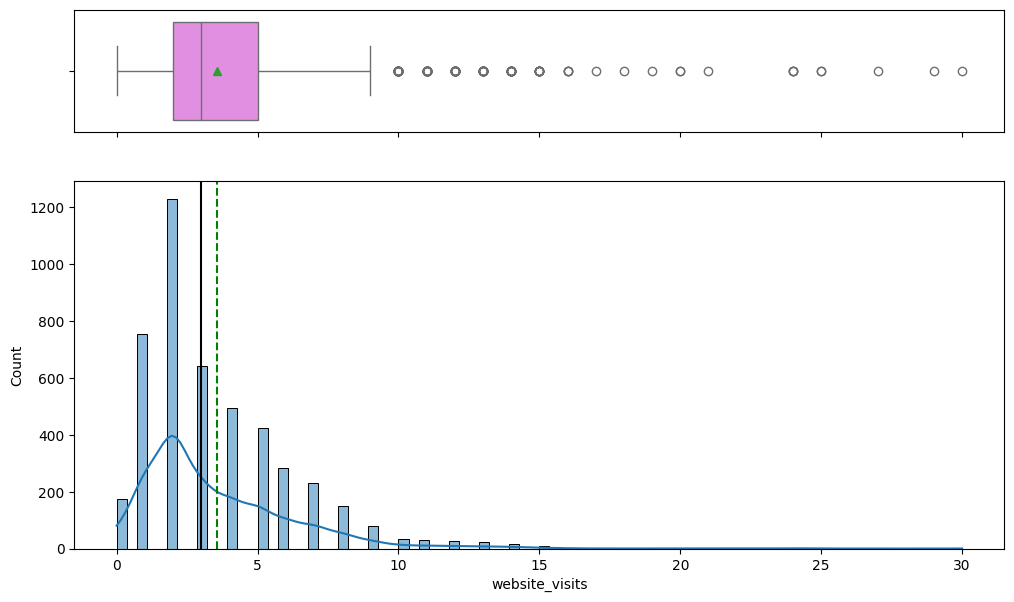

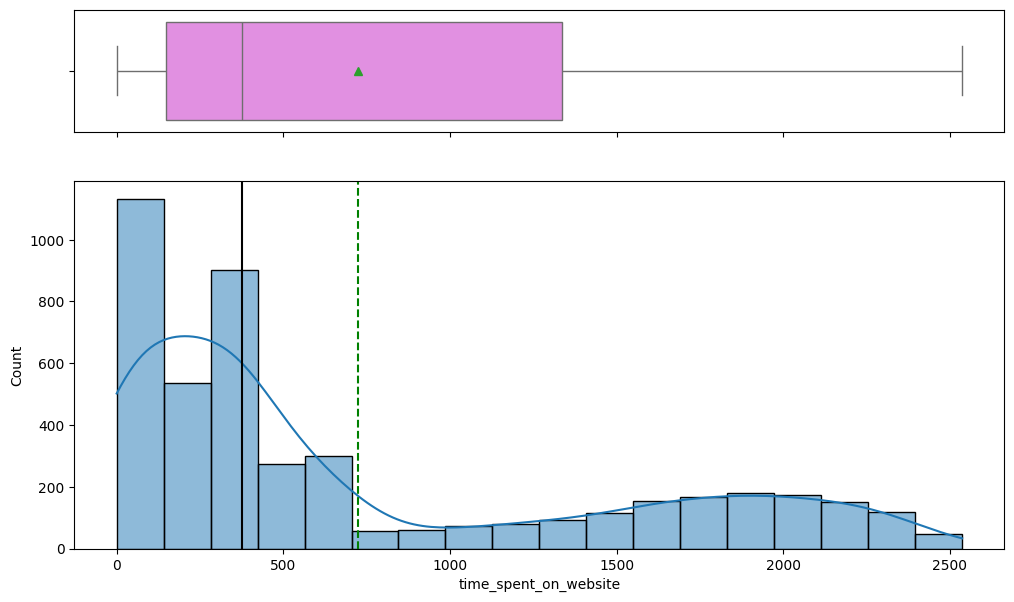

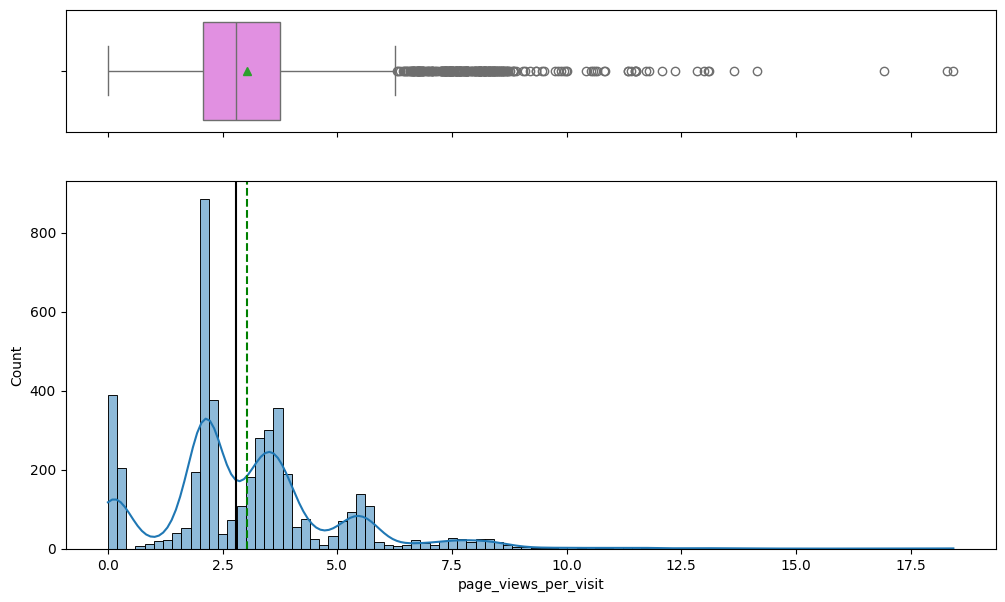

In [ ]:
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
for col in num_cols:
  histogram_boxplot(df, col, kde=True)
  plt.show()
  print('\n\n')

The `age` column is left skewed without outliers

Column `website_visits` is right skewed with some outliers

Column `time_spent_on_website` is right skewed with no outliers

Column `page_views_per_visit` has a multimodal distributions, is slight right skewed, and there are many outliers



### Bivariate Analysis

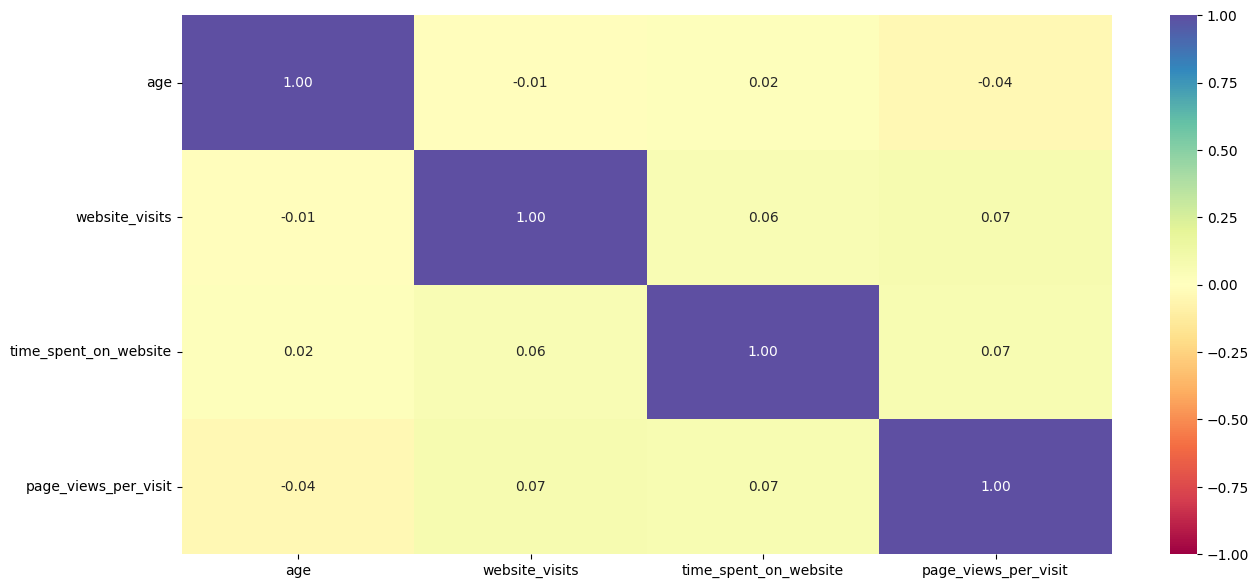

In [ ]:
# Exclude non-numeric columns
numeric_data = df[num_cols]

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

No correlations observed among the continuous numerical variables

In [ ]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


We can see a large difference in the mean for `time_spent_on_website` when grouping by status. This variable should be a good predictor of whether a lead turned into a sale.

In [ ]:
# borrowed from https://olympus.mygreatlearning.com/courses/119822/modules/items/6889254?pb_id=18035
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


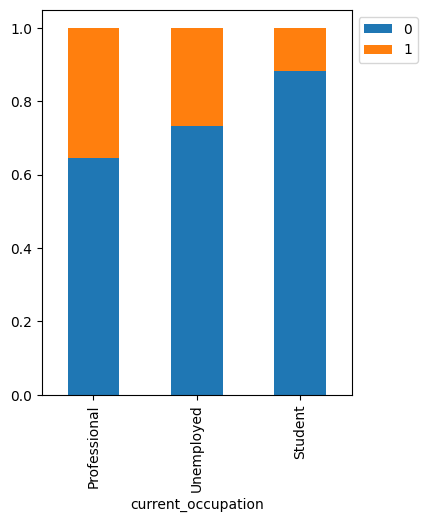

In [ ]:
stacked_barplot(df, 'current_occupation', 'status')

Professionals leads are more likely to become sales. Students leads are least likely to turn into a sale.

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


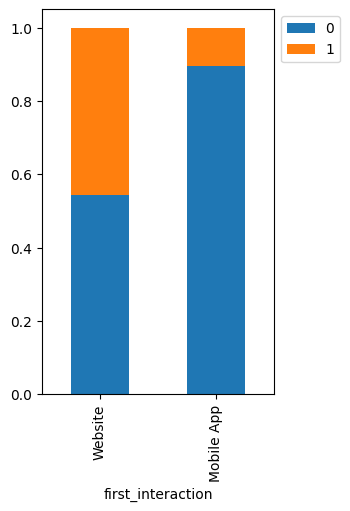

In [ ]:
stacked_barplot(df, 'first_interaction', 'status')

Leads who had a webstie interaction are more likely to lead to a sale. The mobile app interaction does not convert many leads to sales.

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


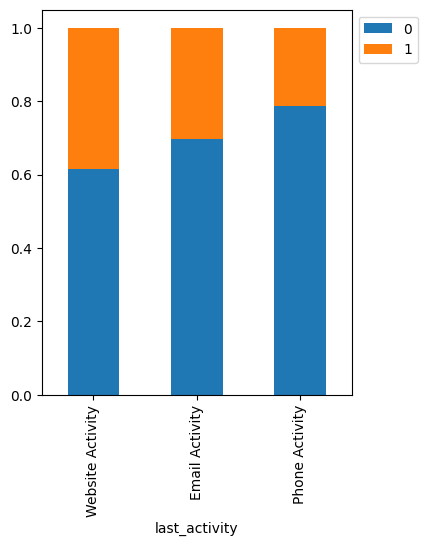

In [ ]:
stacked_barplot(df, 'last_activity', 'status')

Website activity tends to generate more sales. Phone activity is least effective to turn leads into sales.

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


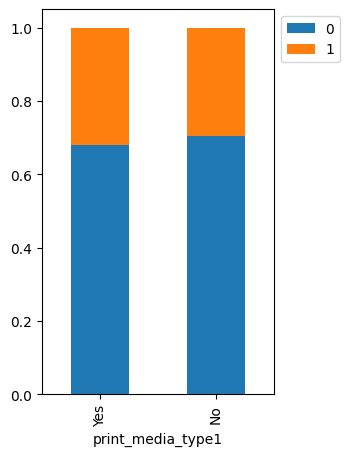

In [ ]:
stacked_barplot(df, 'print_media_type1', 'status')

Whether or not lead saw this print media type made no difference in getting a sale.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


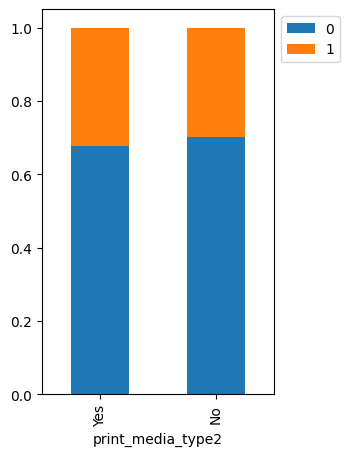

In [ ]:
stacked_barplot(df, 'print_media_type2', 'status')

Whether or not lead saw this print media type made no difference in getting a sale.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


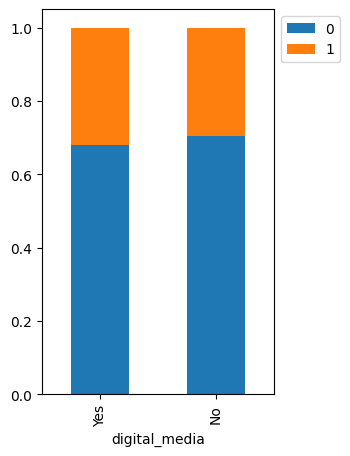

In [ ]:
stacked_barplot(df, 'digital_media', 'status')

Whether or not lead saw a digital ad made no difference in getting a sale.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


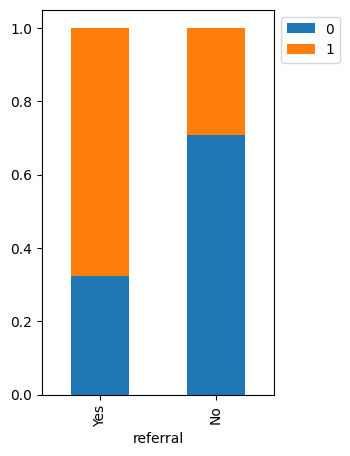

In [ ]:
stacked_barplot(df, 'referral', 'status')

Referrals made a differences in converting a lead to a sale

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


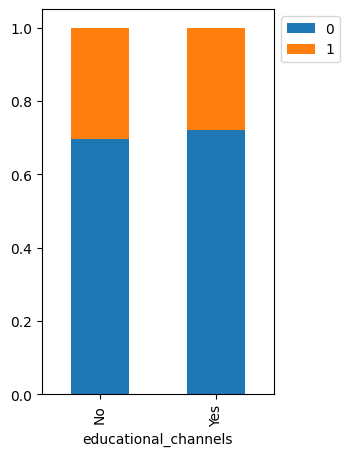

In [ ]:
stacked_barplot(df, 'educational_channels', 'status')

Marketing campaigns in educational forums made no differene in convering a lead to a sale

status             0     1   All
yes_lead_count                  
All             3235  1377  4612
0               2052   831  2883
1                997   445  1442
2                164    87   251
3                 20    13    33
4                  2     1     3
------------------------------------------------------------------------------------------------------------------------


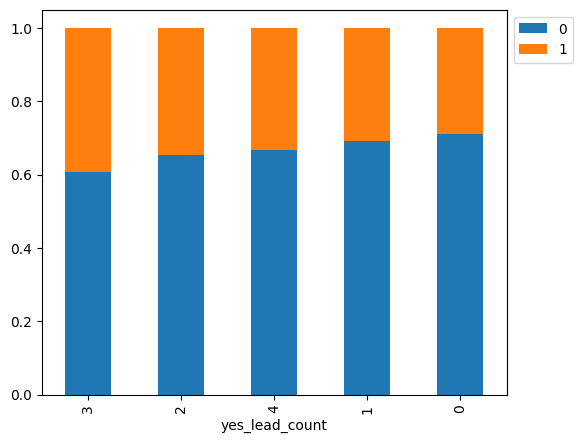

In [ ]:
stacked_barplot(df, 'yes_lead_count', 'status')

Leads who heard from this company tended to have slightly larger chance of converting to a sale than those leads who never heard from this company.

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


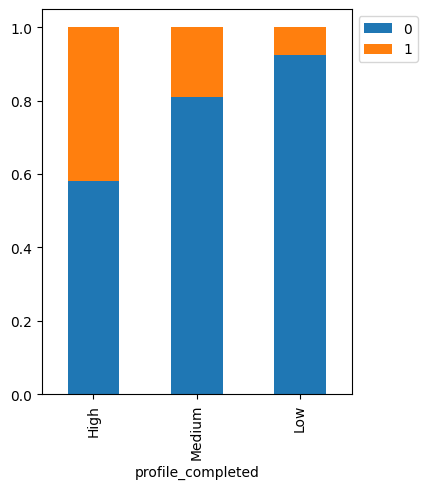

In [ ]:
stacked_barplot(df, 'profile_completed', 'status')

Leads with complete profiles tend to convert to sales.

**Answers to Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

- Leads who are professionals tend to participate in the program. Students are least likely to participate. Unemployed leads are in the middle.

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

- Leads who first interact with the website are more likely to participate in the program than those who first interacted with the mobile app.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

- Interaction via website works best, followed by email. Phone interaction is least effective.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

- Referrals works in converted leads to sales. The print, digital, educational channels make no difference.

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

- Yes sharing more details tends to convert a lead to a sale.

6. Finally, leads who spend more time on the website tend to become paid customers.

## Building a Decision Tree model

In [ ]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating independent variables and the target variable
x = df.drop(columns = ['status'])
y = df['status']

In [ ]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 1)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 17)
Shape of test set :  (923, 17)


In [ ]:
# borrowed from
# https://olympus.mygreatlearning.com/courses/119822/modules/items/6889188?pb_id=18035

# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f',
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



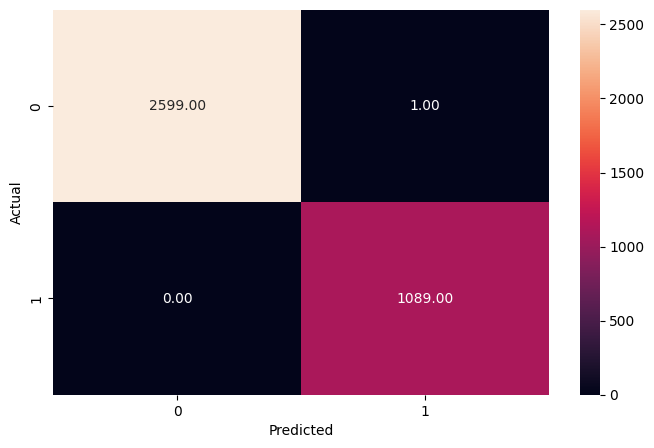

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       635
           1       0.71      0.67      0.69       288

    accuracy                           0.81       923
   macro avg       0.78      0.77      0.78       923
weighted avg       0.81      0.81      0.81       923



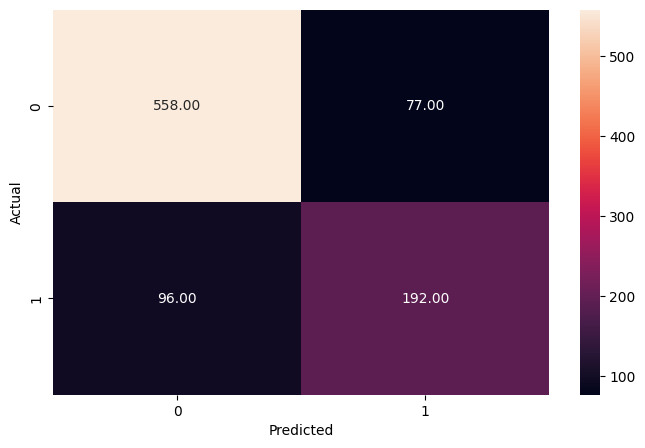

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
rep_dt=pd.DataFrame(classification_report(y_test, y_test_pred_dt,
                                          output_dict=True)).T
rep_dt

,precision,recall,f1-score,support
0,0.853211,0.878740,0.865787,635.000000
1,0.713755,0.666667,0.689408,288.000000
accuracy,0.812568,0.812568,0.812568,0.812568
macro avg,0.783483,0.772703,0.777597,923.000000
weighted avg,0.809697,0.812568,0.810752,923.000000


<Axes: xlabel='Importance', ylabel='None'>

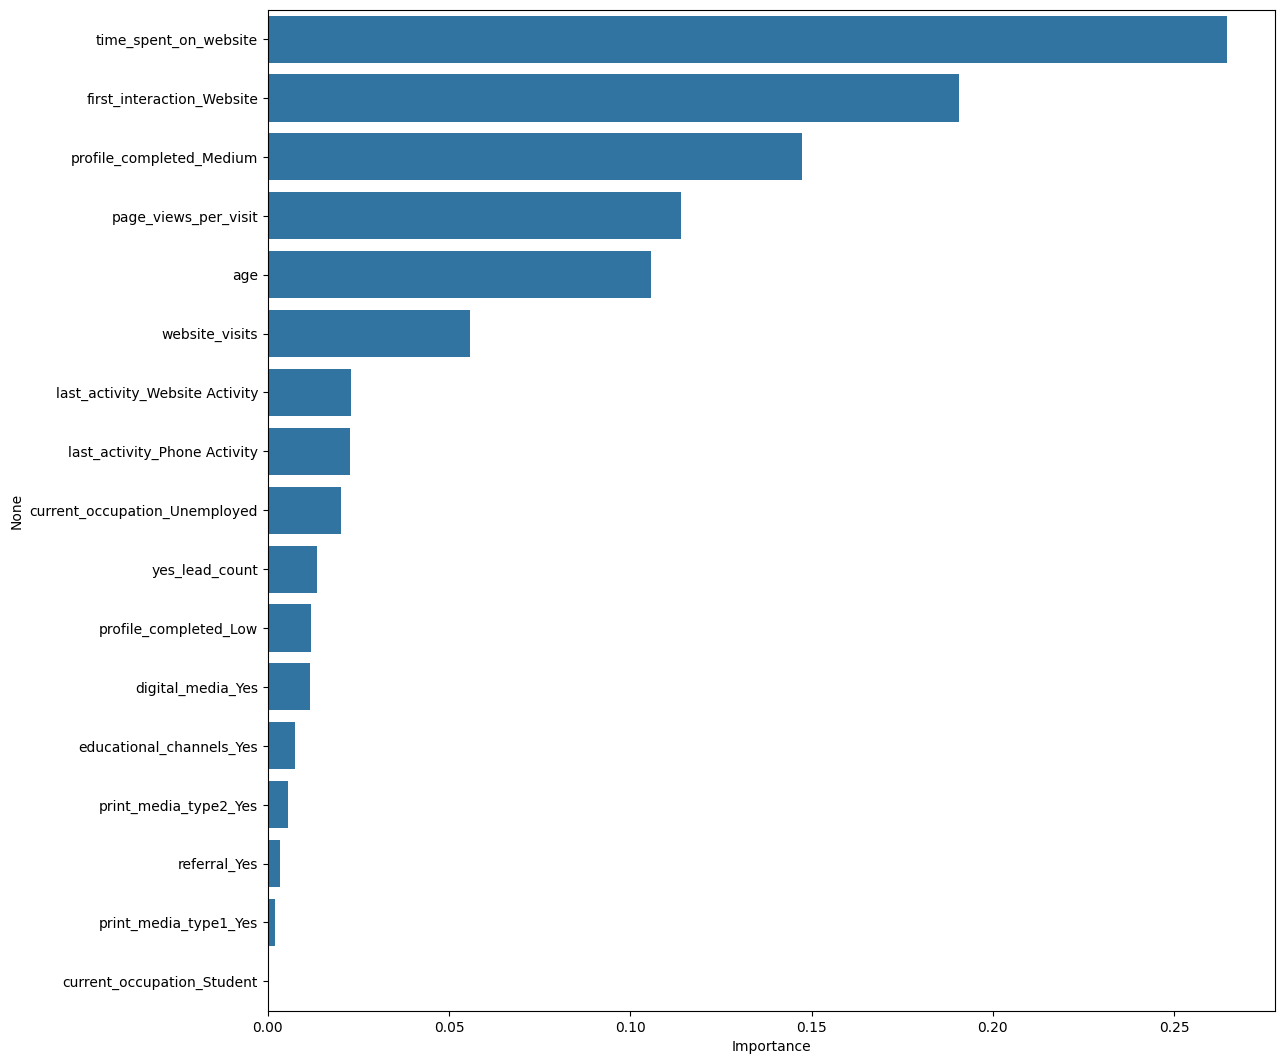

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns,
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

## Do we need to prune the tree?

Yes. We can see overfitting due to the perfect recall, accuracy, and f1 scores for the train data

## Decision Tree Hyperparameter Tuning

We will prune the tree by choosing the best decision tree from a set of hyperparameters.

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7},
                                         random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=np.int64(6),
                       min_samples_leaf=20, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2600
           1       0.69      0.87      0.77      1089

    accuracy                           0.85      3689
   macro avg       0.81      0.85      0.83      3689
weighted avg       0.87      0.85      0.85      3689



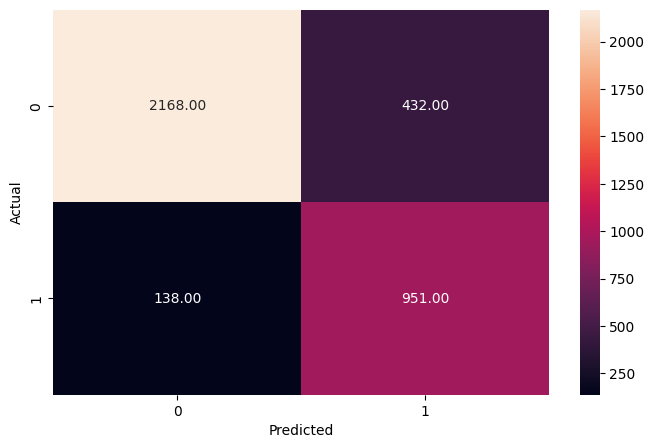

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       635
           1       0.71      0.82      0.76       288

    accuracy                           0.84       923
   macro avg       0.81      0.83      0.82       923
weighted avg       0.85      0.84      0.84       923



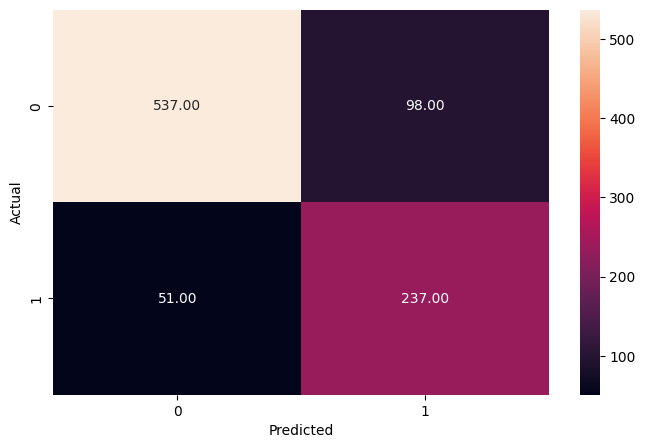

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
rep_dt_tuned=pd.DataFrame(classification_report(y_test, y_test_pred_dt,
                                          output_dict=True)).T
rep_dt_tuned

,precision,recall,f1-score,support
0,0.913265,0.845669,0.878168,635.00000
1,0.707463,0.822917,0.760835,288.00000
accuracy,0.838570,0.838570,0.838570,0.83857
macro avg,0.810364,0.834293,0.819502,923.00000
weighted avg,0.849050,0.838570,0.841557,923.00000


By choosing hyperparaters, we get more realistic values for precision, recal, and f1-score on train data. On test data for the positive class, the scores for recall and f1-score drop slightly. The precision score increases slightly.

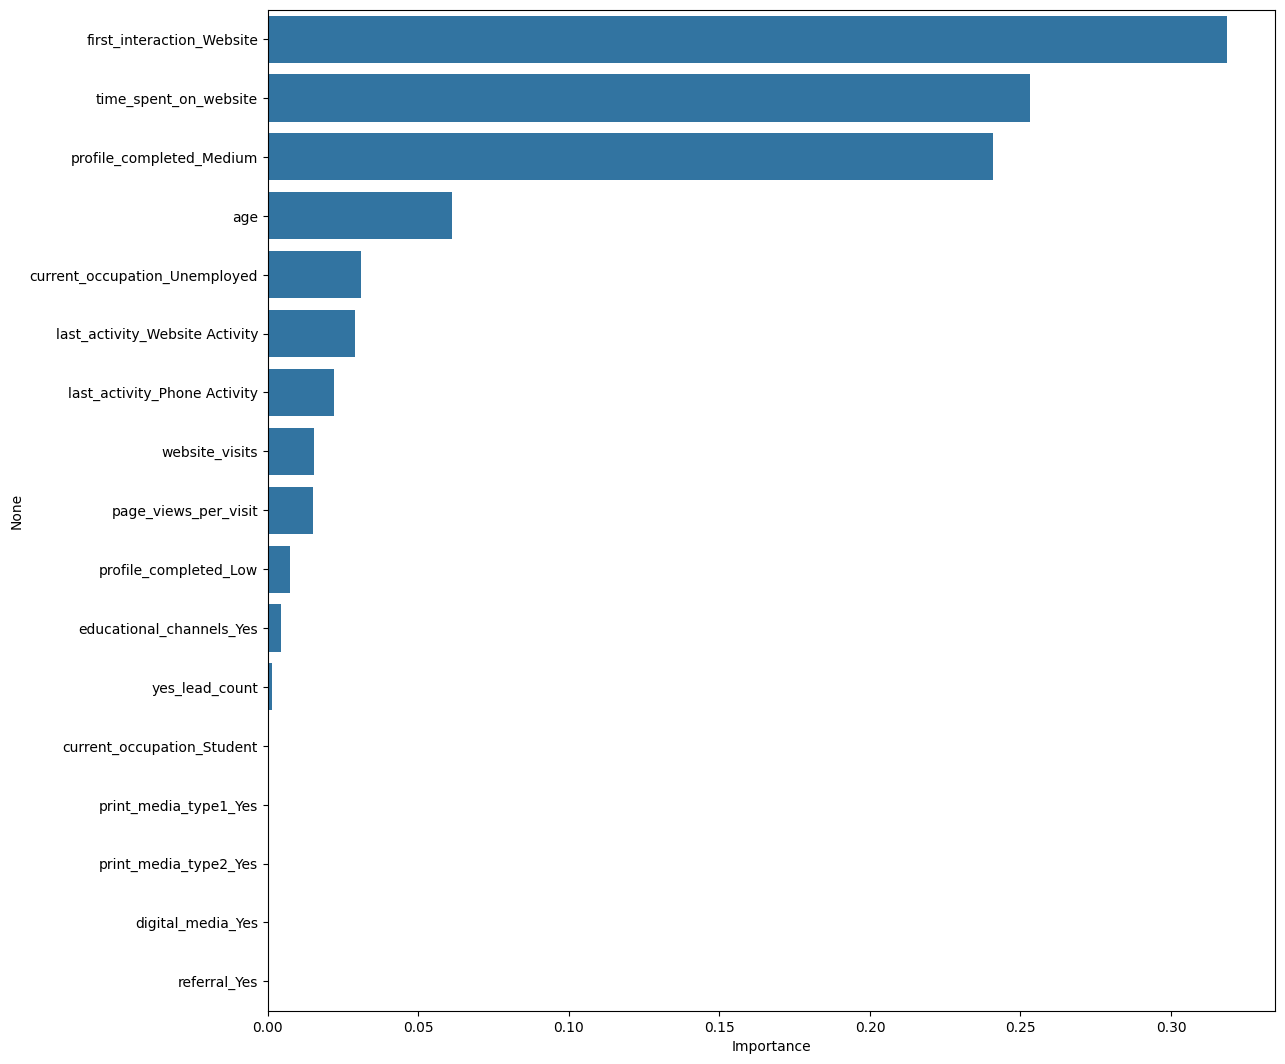

In [ ]:
importances = dtree_estimator.feature_importances_
columns = x.columns

importance_df = pd.DataFrame(importances, index=columns,
                             columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7},
                                      random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



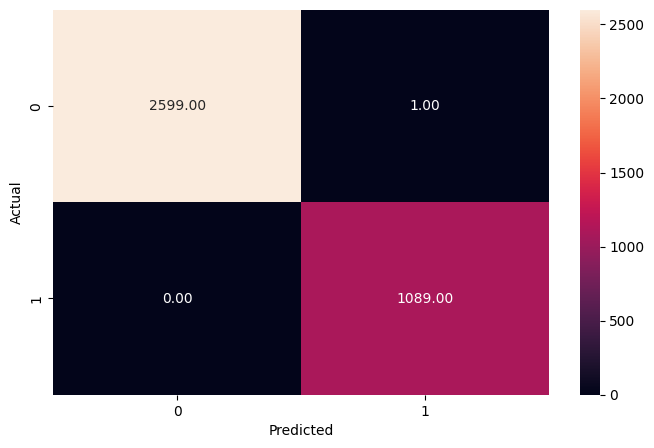

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       635
           1       0.81      0.70      0.75       288

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.83       923
weighted avg       0.85      0.86      0.85       923



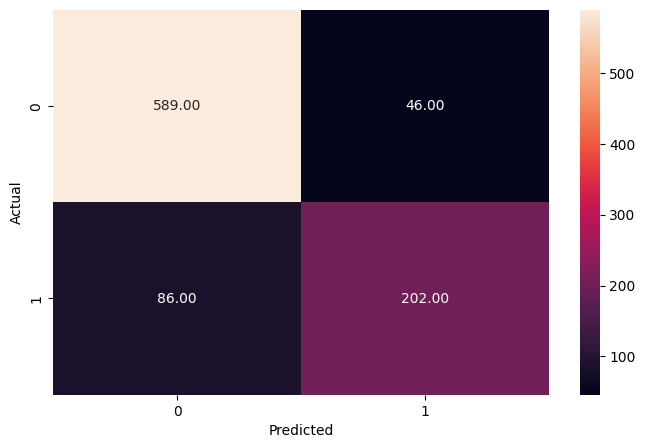

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rep_rf=pd.DataFrame(classification_report(y_test, y_pred_test_rf,
                                          output_dict=True)).T
rep_rf

,precision,recall,f1-score,support
0,0.872593,0.927559,0.899237,635.000000
1,0.814516,0.701389,0.753731,288.000000
accuracy,0.856988,0.856988,0.856988,0.856988
macro avg,0.843554,0.814474,0.826484,923.000000
weighted avg,0.854471,0.856988,0.853835,923.000000


<Axes: xlabel='Importance', ylabel='None'>

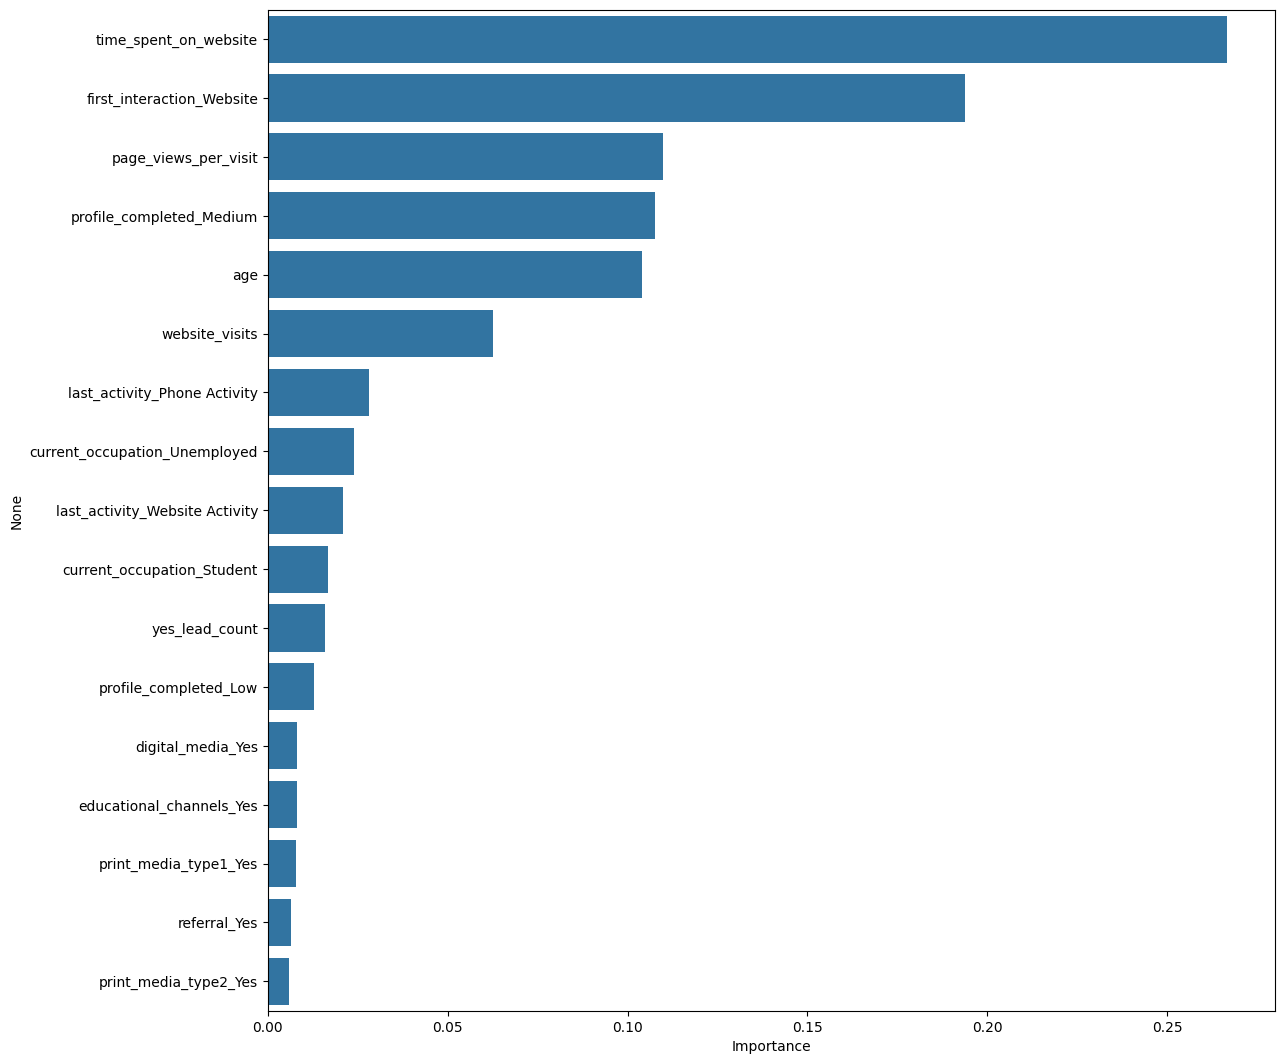

In [ ]:
importances = rf_estimator.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns,
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance,
            y = importance_df.index)

## Do we need to prune the tree?

Yes. We get perfect scores on the train data, indicating overfitting.

## Random Forest Hyperparameter Tuning

We will prune tree by choosing best random forest model from a set of hyperparameters

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7},
                                            random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       min_samples_leaf=np.int64(3), n_estimators=250,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2600
           1       0.88      0.96      0.92      1089

    accuracy                           0.95      3689
   macro avg       0.93      0.96      0.94      3689
weighted avg       0.95      0.95      0.95      3689



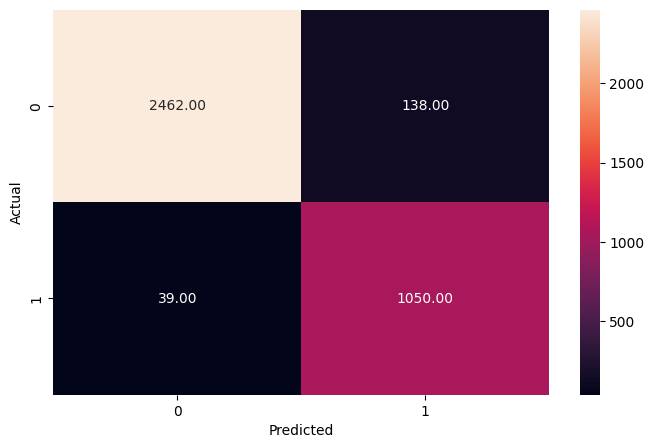

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       635
           1       0.78      0.76      0.77       288

    accuracy                           0.86       923
   macro avg       0.84      0.83      0.84       923
weighted avg       0.86      0.86      0.86       923



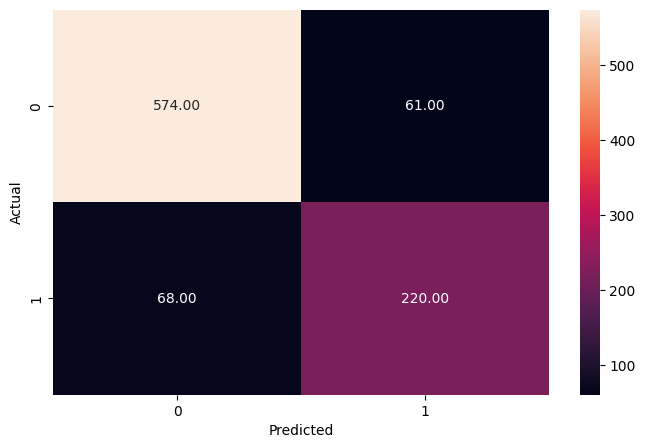

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rep_rf_tuned=pd.DataFrame(classification_report(y_test, y_pred_test_rf_tuned,
                                                output_dict=True)).T
rep_rf_tuned

,precision,recall,f1-score,support
0,0.894081,0.903937,0.898982,635.000000
1,0.782918,0.763889,0.773286,288.000000
accuracy,0.860238,0.860238,0.860238,0.860238
macro avg,0.838500,0.833913,0.836134,923.000000
weighted avg,0.859395,0.860238,0.859762,923.000000


<Axes: xlabel='Importance', ylabel='None'>

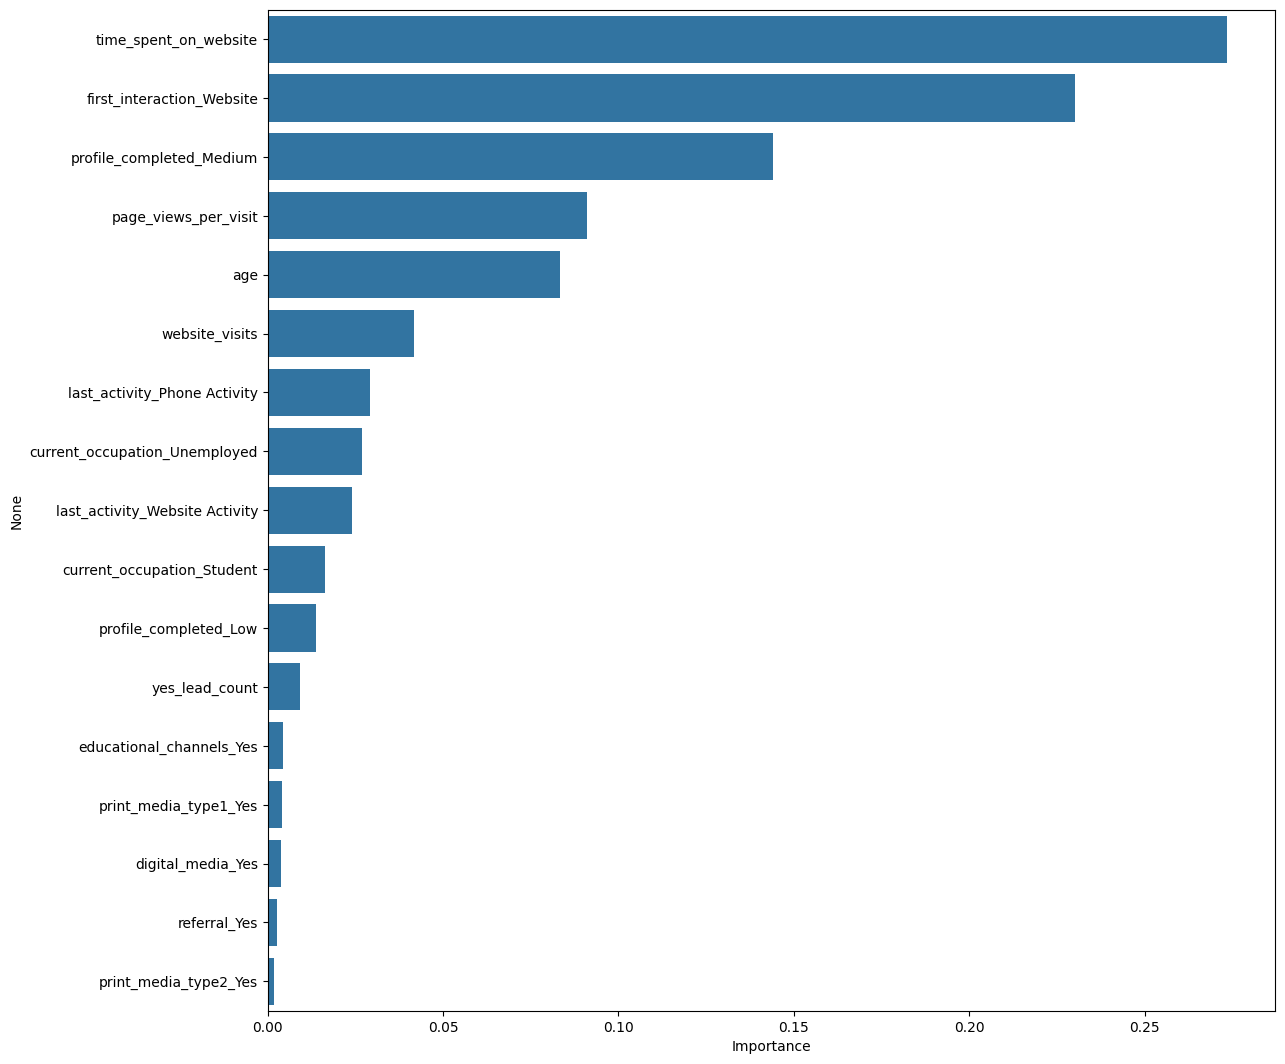

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns,
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

In [ ]:
rep_dt

,precision,recall,f1-score,support
0,0.853211,0.878740,0.865787,635.000000
1,0.713755,0.666667,0.689408,288.000000
accuracy,0.812568,0.812568,0.812568,0.812568
macro avg,0.783483,0.772703,0.777597,923.000000
weighted avg,0.809697,0.812568,0.810752,923.000000


In [ ]:
rep_dt_tuned

,precision,recall,f1-score,support
0,0.913265,0.845669,0.878168,635.00000
1,0.707463,0.822917,0.760835,288.00000
accuracy,0.838570,0.838570,0.838570,0.83857
macro avg,0.810364,0.834293,0.819502,923.00000
weighted avg,0.849050,0.838570,0.841557,923.00000


In [ ]:
rep_rf

,precision,recall,f1-score,support
0,0.872593,0.927559,0.899237,635.000000
1,0.814516,0.701389,0.753731,288.000000
accuracy,0.856988,0.856988,0.856988,0.856988
macro avg,0.843554,0.814474,0.826484,923.000000
weighted avg,0.854471,0.856988,0.853835,923.000000


In [ ]:
rep_rf_tuned

,precision,recall,f1-score,support
0,0.894081,0.903937,0.898982,635.000000
1,0.782918,0.763889,0.773286,288.000000
accuracy,0.860238,0.860238,0.860238,0.860238
macro avg,0.838500,0.833913,0.836134,923.000000
weighted avg,0.859395,0.860238,0.859762,923.000000


## Actionable Insights and Recommendations

The random forest tuned model gives the highest f1 score for the positive class standing at 0.77

The most important feature is `time_spent_on_website` which was also identified as a relevant predictor in the EDA section. The other relevant features are `first_interaction`, `profile_completed`, `page_views`, `age`, `website_visits`, `last_activity`, `current_occupation` in this order of relevance.

Per the EDA and as indicated in the model, the features related to marketing campaigns do not make an impact on converting leads to sales. The marketing strategies need to be reviewed or dropped altogether.

Per EDA, referrals are most effective in converting leads to sales.

Finally, EDA indicated frustrations with the mobile app experience. The mobile app would need to be checked for bugs, slowness, or other issues affecting the experience. Website interaction is the most effective way to convert leads to paying customers. Phone/email interaction tends to be less effective.






In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Learner Notebook - Full Code Version - Potential Customers Prediction.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Learner Notebook - Full Code Version - Potential Customers Prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 31 image(s).
[NbConvertApp] Writing 1471942 bytes to /content/drive/MyDrive/Colab Notebooks/Learner Notebook - Full Code Version - Potential Customers Prediction.html
